In [106]:
import pprint
import json
import pandas as pd
import matplotlib.pyplot as plt
from json_shot_scraper import flatten_shot

%matplotlib inline

In [1]:
spark

In [84]:
with open ('data/test.json') as f:
    data = json.load(f)
    game_id = 448628

In [85]:
data['incidences'].keys()

dict_keys(['goals', 'substitutions', 'clearances', 'cornerKicks', 'correctPasses', 'fouls', 'incorrectPasses', 'offsides', 'redCards', 'shots', 'status', 'stealings', 'yellowCards', 'throwIn', 'goalkick', 'nutmegs', 'sombreros', 'penaltyShootout'])

In [86]:
shots = list(data['incidences']['shots'].items())

In [87]:
shot = shots[0]

In [88]:
shot

('23169781',
 {'type': 35,
  't': {'half': 1, 'm': 5, 's': 9},
  'team': 490,
  'plyrId': 145031,
  'ctchBy': 382,
  'coord': {'1': {'x': -0.68, 'y': -0.31, 'z': -1},
   '2': {'x': -0.94, 'y': -0.18, 'z': 0.86}}})

In [107]:
# def flatten_shot(shot, game_id):
#     """Flatten the schema of a shot record."""
#     shot_id = shot[0]
#     shot_data = shot[1]
    
#     return {'game_id': game_id,
#             'shot_id': shot_id,
#             'shot_type': shot_data['type'],
#             't_half': shot_data['t']['half'],
#             't_min': shot_data['t']['m'],
#             't_sec': shot_data['t']['s'], 
#             'team_id': shot_data['team'],
#             'player_id': shot_data['plyrId'],
#             'caught_by': shot_data.get('ctchBy', None),
#             'coord_x1': shot_data['coord']['1']['x'],
#             'coord_y1': shot_data['coord']['1']['y'],
#             'coord_z1': shot_data['coord']['1']['z'],
#             'coord_x2': shot_data['coord']['2']['x'],
#             'coord_y2': shot_data['coord']['2']['y'],
#             'coord_z2': shot_data['coord']['2']['z']}

In [108]:
shot_list_dicts = [flatten_shot(shot, game_id) for shot in shots]

In [91]:
shot_df = pd.DataFrame(shot_list_dicts)

In [110]:
shot_df.head()

,caught_by,coord_x1,coord_x2,coord_y1,coord_y2,coord_z1,coord_z2,game_id,player_id,shot_id,shot_type,t_half,t_min,t_sec,team_id
0,382.0,-0.68,-0.94,-0.31,-0.18,-1,0.86,448628,145031,23169781,35,1,5,9,490
1,36751.0,0.76,0.95,0.40,-0.08,-1,0.83,448628,47808,23169915,35,1,11,39,122
2,NaN,0.87,0.99,0.37,0.14,-1,-1.00,448628,30266,23169922,33,1,12,18,122
3,NaN,0.77,0.96,0.01,-0.02,-1,0.98,448628,29345,23170432,34,1,25,53,122
4,NaN,0.72,1.00,0.10,-0.11,-1,-1.00,448628,29345,23170506,33,1,27,58,122


In [104]:
#where they're shooting from...

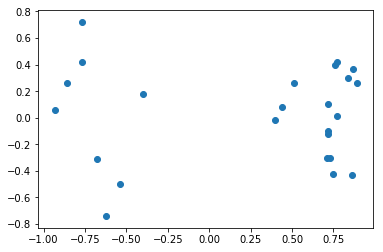

In [93]:
plt.scatter(shot_df['coord_x1'], shot_df['coord_y1'])

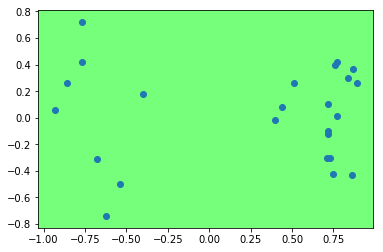

In [103]:
fig, ax = plt.subplots()
ax.scatter(shot_df['coord_x1'], shot_df['coord_y1'])
ax.set_facecolor('xkcd:lightgreen')


In [ ]:
fig, ax = plt.subplots

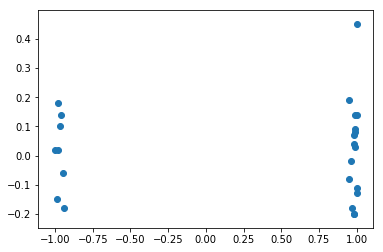

In [94]:
plt.scatter(shot_df['coord_x2'], shot_df['coord_y2'])
plt.se

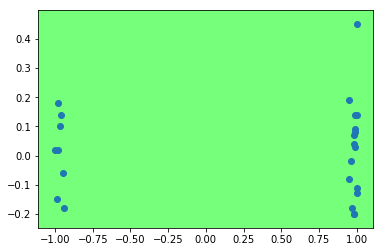

In [105]:
#where shots end up
fig, ax = plt.subplots()
ax.scatter(shot_df['coord_x2'], shot_df['coord_y2'])
ax.set_facecolor('xkcd:lightgreen')

In [95]:
shot_df['coord_z2'].describe()

count    24.000000
mean     -0.303750
std       0.868496
min      -1.000000
25%      -1.000000
50%      -1.000000
75%       0.575000
max       1.000000
Name: coord_z2, dtype: float64

In [2]:
df = spark.read.json('data/test.json')

In [3]:
df.persist().printSchema()

root
 |-- Revision: string (nullable = true)
 |-- broadcast: struct (nullable = true)
 |    |-- media: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- mediaId: long (nullable = true)
 |    |    |    |-- name: string (nullable = true)
 |-- commentary: struct (nullable = true)
 |    |-- 23169665: struct (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- ts: long (nullable = true)
 |    |-- 23169671: struct (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- ts: long (nullable = true)
 |    |-- 23169683: struct (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- ts: long (nullable = true)
 |    |-- 23169699: struct (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- ts: long (nullable = true)
 |    |-- 23169713: struct (nullable = true)
 |    |    |-- t: string (nullable = true)
 |    |    |-- ts: long (nullable = true)
 |    |-- 23169730: struc

In [ ]:
df.

In [4]:
df_pandas = df.toPandas()

In [5]:
df_pandas.head()

,Revision,broadcast,commentary,deletedIncidences,incidences,lastChangeBy,lastChangedDate,match,officials,players,scoreStatus,status,summary,teams,venueInformation
0,$Revision: 1318 $,"([(10059, Fox Sports Premium)],)","((status, 1538842533), (goalkick, 1538842557),...",[],"(((30266, Row(half=1, m=1, s=24), 122, 29), (3...",$LastChangedBy: lganga $,$LastChangedDate: 2013-12-08 13:20:58 -0300 (0...,"(490, San Martín (T), primeraa, Argentina - Su...","((Argentina, 1, (Facundo, Tello, None, None), ...","((False, m, (Rodrigo, Moreira, Miguel, None, R...","((, 2, None, None, None), (, 0, None, None, No...","(Fin, 95, 2, False, 48, 26, True, False, None,...","((394, 129, (40, 11, 15, 7, 20, 24, 21, 5, 26,...","(((#00ff00, #007f00, vert, #fbff00, , , 1, #e6...","(((Parque Municipal de los Deportes, None, 353..."


In [46]:
player_id_dict = {}

In [55]:
df_pandas['players'][0][0]

Row(captain=False, gender='m', name=Row(first='Rodrigo', last='Moreira', middle='Miguel', nick=None, shortName='Rodrigo Moreira'), order=4, playMaker=False, posnId=2, rating='6.1', squadNo=4, substitute=False, teamId=490)

In [57]:
df_pandas['players'][0]

Row(100778=Row(captain=False, gender='m', name=Row(first='Rodrigo', last='Moreira', middle='Miguel', nick=None, shortName='Rodrigo Moreira'), order=4, playMaker=False, posnId=2, rating='6.1', squadNo=4, substitute=False, teamId=490), 10752=Row(captain=False, gender='m', name=Row(first='Leonardo', last='Sánchez', middle='Agustín', nick=None, shortName='Leonardo Sánchez'), order=15, playMaker=False, posnId=2, rating='6.3', squadNo=16, substitute=True, teamId=122), 114498=Row(captain=False, gender='m', name=Row(first='Iván', last='Colman', middle='Leonardo', nick=None, shortName='Iván Colman'), order=8, playMaker=False, posnId=3, rating='6.3', squadNo=28, substitute=False, teamId=122), 126700=Row(captain=False, gender='m', name=Row(first='Nicolás', last='Giménez', middle='Ezequiel', nick=None, shortName='Nicolás Giménez'), order=8, playMaker=False, posnId=3, rating='5.4', squadNo=31, substitute=False, teamId=490), 137579=Row(captain=False, gender='m', name=Row(first='Emiliano', last='Amor

In [51]:
type(df_pandas['players'][0])

pyspark.sql.types.Row

In [59]:
df_pandas['summary'][0]

Row(allPasses=Row(awayQty=394, homeQty=129, perPlayerQty=Row(100778=40, 114498=11, 126700=15, 137579=7, 145031=20, 15113=24, 15393=21, 163289=5, 186030=26, 19308=27, 20478=8, 205120=16, 29345=3, 30266=9, 36751=20, 382=6, 45616=16, 47808=15, 52418=16, 55627=22, 56334=7, 70512=47, 89096=11, 94965=39, 98359=56, 99085=36)), assists=Row(awayQty=0, homeQty=1, perPlayerQty=Row(205120=1)), ballPossesion=Row(awayQty=67, homeQty=33), clearances=Row(awayQty=21, homeQty=16, perPlayerQty=Row(100778=5, 10752=1, 137579=4, 15113=2, 205120=2, 29345=1, 30266=1, 36751=3, 45616=1, 47808=2, 55627=2, 56334=1, 70512=2, 89096=2, 94965=3, 98359=2, 99085=3)), cornerKicks=Row(awayQty=3, homeQty=11, perPlayerQty=Row(114498=4, 126700=1, 15393=1, 30266=1, 70512=1, 89096=6)), correctPasses=Row(awayQty=282, homeQty=108, perPlayerQty=Row(100778=30, 114498=10, 126700=12, 137579=5, 145031=17, 15113=16, 15393=15, 163289=3, 186030=16, 19308=26, 20478=6, 205120=14, 29345=1, 30266=8, 36751=12, 382=6, 45616=14, 47808=14, 524